In [90]:
from langgraph.graph import StateGraph,START,END
from typing import TypedDict

In [91]:
class BatsmanState(TypedDict):
    runs:int
    balls:int
    sixes:int
    fours:int
    sr:float
    bpb:float
    boundary_percentage:float
    summary:str

In [92]:
def calculate_sr(state:BatsmanState)->BatsmanState:
    sr=(state["runs"]/state["balls"])*100
    ##Updating the state


 #It will give error in parallel workflow because there are three node and the after coming node expect there moght be some chnages but which update should it accept.
    ## so Instead of retruning the whole State, we just return the variable where changes happened
    
    #state["sr"]=sr

    #return state

    return{"sr":sr}

def calculate_bpb(state:BatsmanState)->BatsmanState:

    bpb=state["balls"]/state["fours"]+state["sixes"]
    

    #It will give error in parallel workflow because there are three node and the after coming node expect there moght be some chnages but which update should it accept.
    ## so Instead of retruning the whole State, we just return the variable where changes happened

    # state["bpb"]=bpb

    # return state
    return {"bpb":bpb}

def calculate_bpercent(state:BatsmanState)->BatsmanState:

   boundary_percent=(((state["fours"]*4)+(state["sixes"]*6))/state["runs"])*100
#    state["boundary_percentage"]=boundary_percent

   return {"boundary_percentage":boundary_percent}


def summary(state:BatsmanState)->BatsmanState:
    summary=f'''
    Strike Rate - {state['sr']}\n
    Balls per Boundary - {state['bpb']}\n
    '''
    state["summary"]=summary

    return state

In [93]:
#Intializing the Graph
graph=StateGraph(BatsmanState)


## Adding Nodes
graph.add_node("calculate_sr",calculate_sr)
graph.add_node("calculate_bpb",calculate_bpb)
graph.add_node("calculate_bpercent",calculate_bpercent)
graph.add_node("summary",summary)

## Adding the Edges

graph.add_edge(START,"calculate_sr")
graph.add_edge(START,"calculate_bpb")
graph.add_edge(START,"calculate_bpercent")
graph.add_edge("calculate_sr","summary")
graph.add_edge("calculate_bpb","summary")
graph.add_edge("calculate_bpercent","summary")

graph.add_edge("summary",END)

##Compiling
workflow=graph.compile()

##Viewing
##Execution

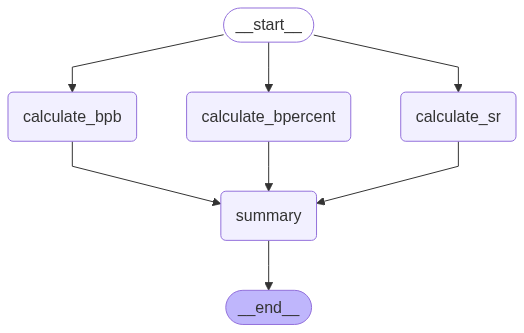

In [94]:
##Viewing
from IPython.display import Image
Image(workflow.get_graph().draw_mermaid_png())

In [95]:
#Execution

initial_state={
    'runs':79,
    'balls':39,
    "fours":4,
    "sixes":3

}

final_output=workflow.invoke(initial_state)

In [96]:
print(final_output)

{'runs': 79, 'balls': 39, 'sixes': 3, 'fours': 4, 'sr': 202.56410256410254, 'bpb': 12.75, 'boundary_percentage': 43.037974683544306, 'summary': '\n    Strike Rate - 202.56410256410254\n\n    Balls per Boundary - 12.75\n\n    '}
